# Data analysis: Iris dataset

Dataset from:

https://archive.ics.uci.edu/ml/datasets/iris

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setup

In [2]:
plt.style.use("ggplot")

## Read CSV

In [3]:
df = pd.read_csv("iris.data", names=("sepal_length", "sepal_width", "petal_length", "petal_width", "class"))
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Examine

In [4]:
df[["class"]].value_counts()

class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Make plots

### Run sequence plot

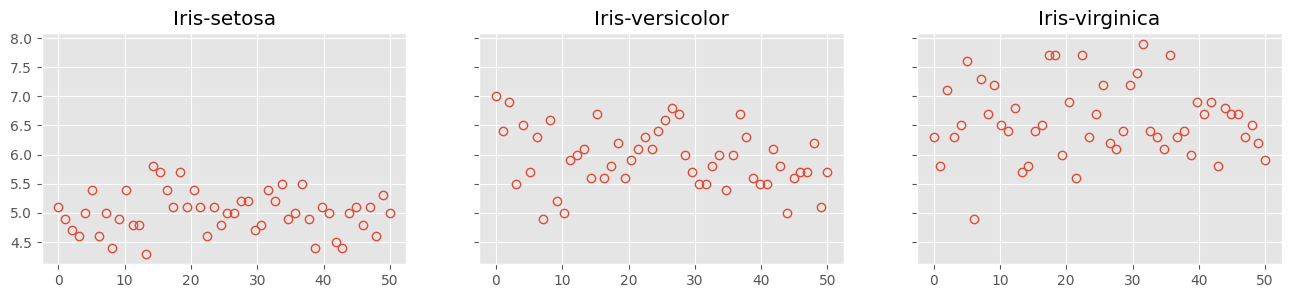

In [5]:
def seqplot(attr, w, h):
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    fig.set_size_inches(w, h)

    for i, (species, species_df) in enumerate(df.groupby("class")):
        axs[i].plot(np.linspace(0, len(species_df), len(species_df)), species_df[attr], "o", fillstyle="none")
        axs[i].set_title(species)
        
seqplot(attr="sepal_length", w=16, h=3)

### Strip plot

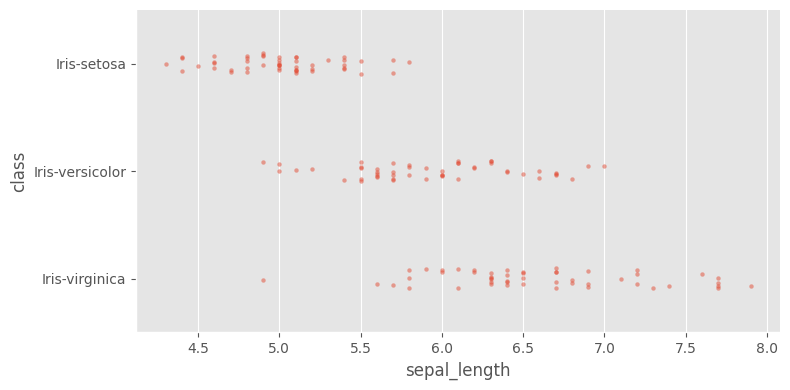

In [6]:
sns.catplot(data=df, x="sepal_length", y="class", kind="strip", height=4, aspect=2, alpha=0.5, s=10)

### Histogram

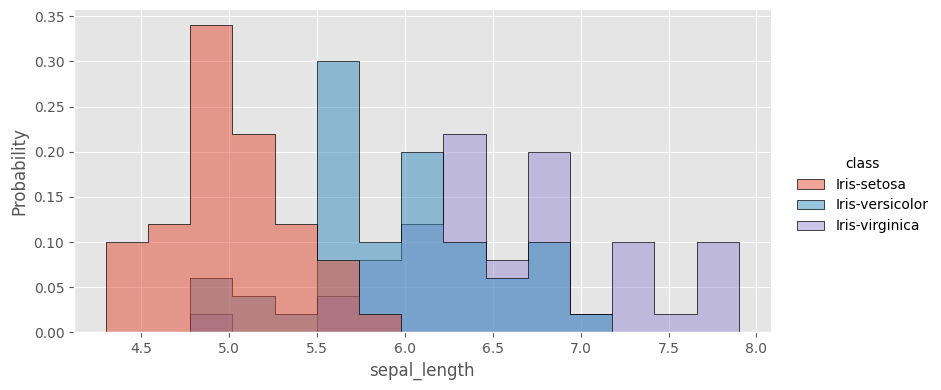

In [7]:
sns.displot(df, x="sepal_length", hue="class", stat="probability", element="step", 
            bins=15, common_norm=False, height=4, aspect=2, alpha=0.5, edgecolor="black")

### ECDF

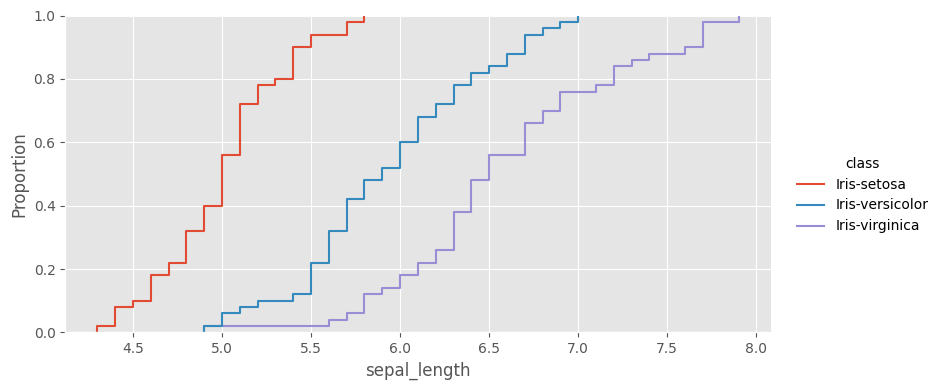

In [8]:
sns.displot(data=df, x="sepal_length", hue="class", kind="ecdf", height=4, aspect=2)

### KDE

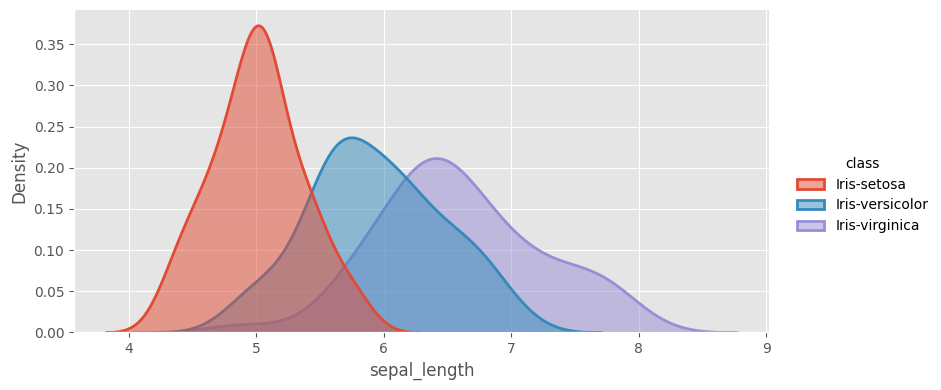

In [9]:
sns.displot(data=df, x="sepal_length", hue="class", kind="kde", height=4, aspect=2, fill=True, alpha=0.5, linewidth=2)

### Box plot

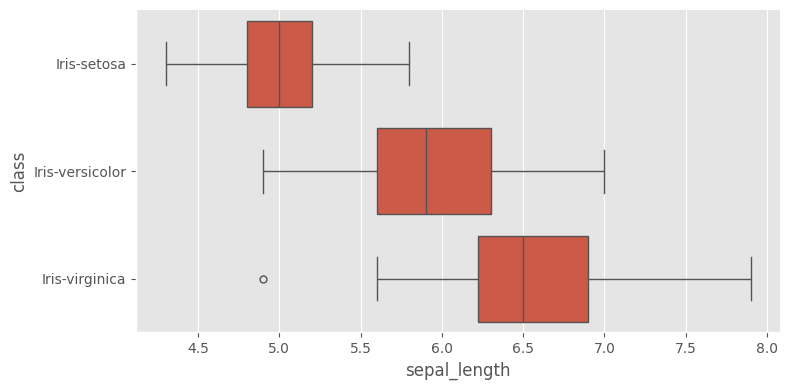

In [10]:
sns.catplot(data=df, x="sepal_length", y="class", kind="box", height=4, aspect=2)